#  Petite Pandas: Data Analysis using NumPy
> Code for a series of lessons based on the utilization of NumPy to read and change aspects of images and data files.

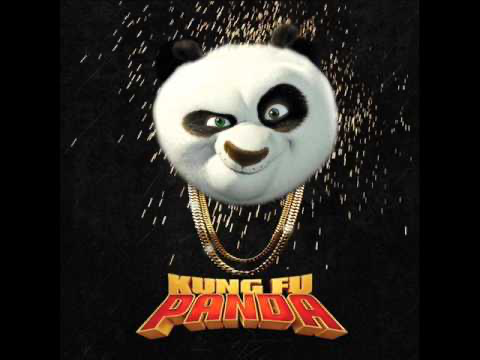

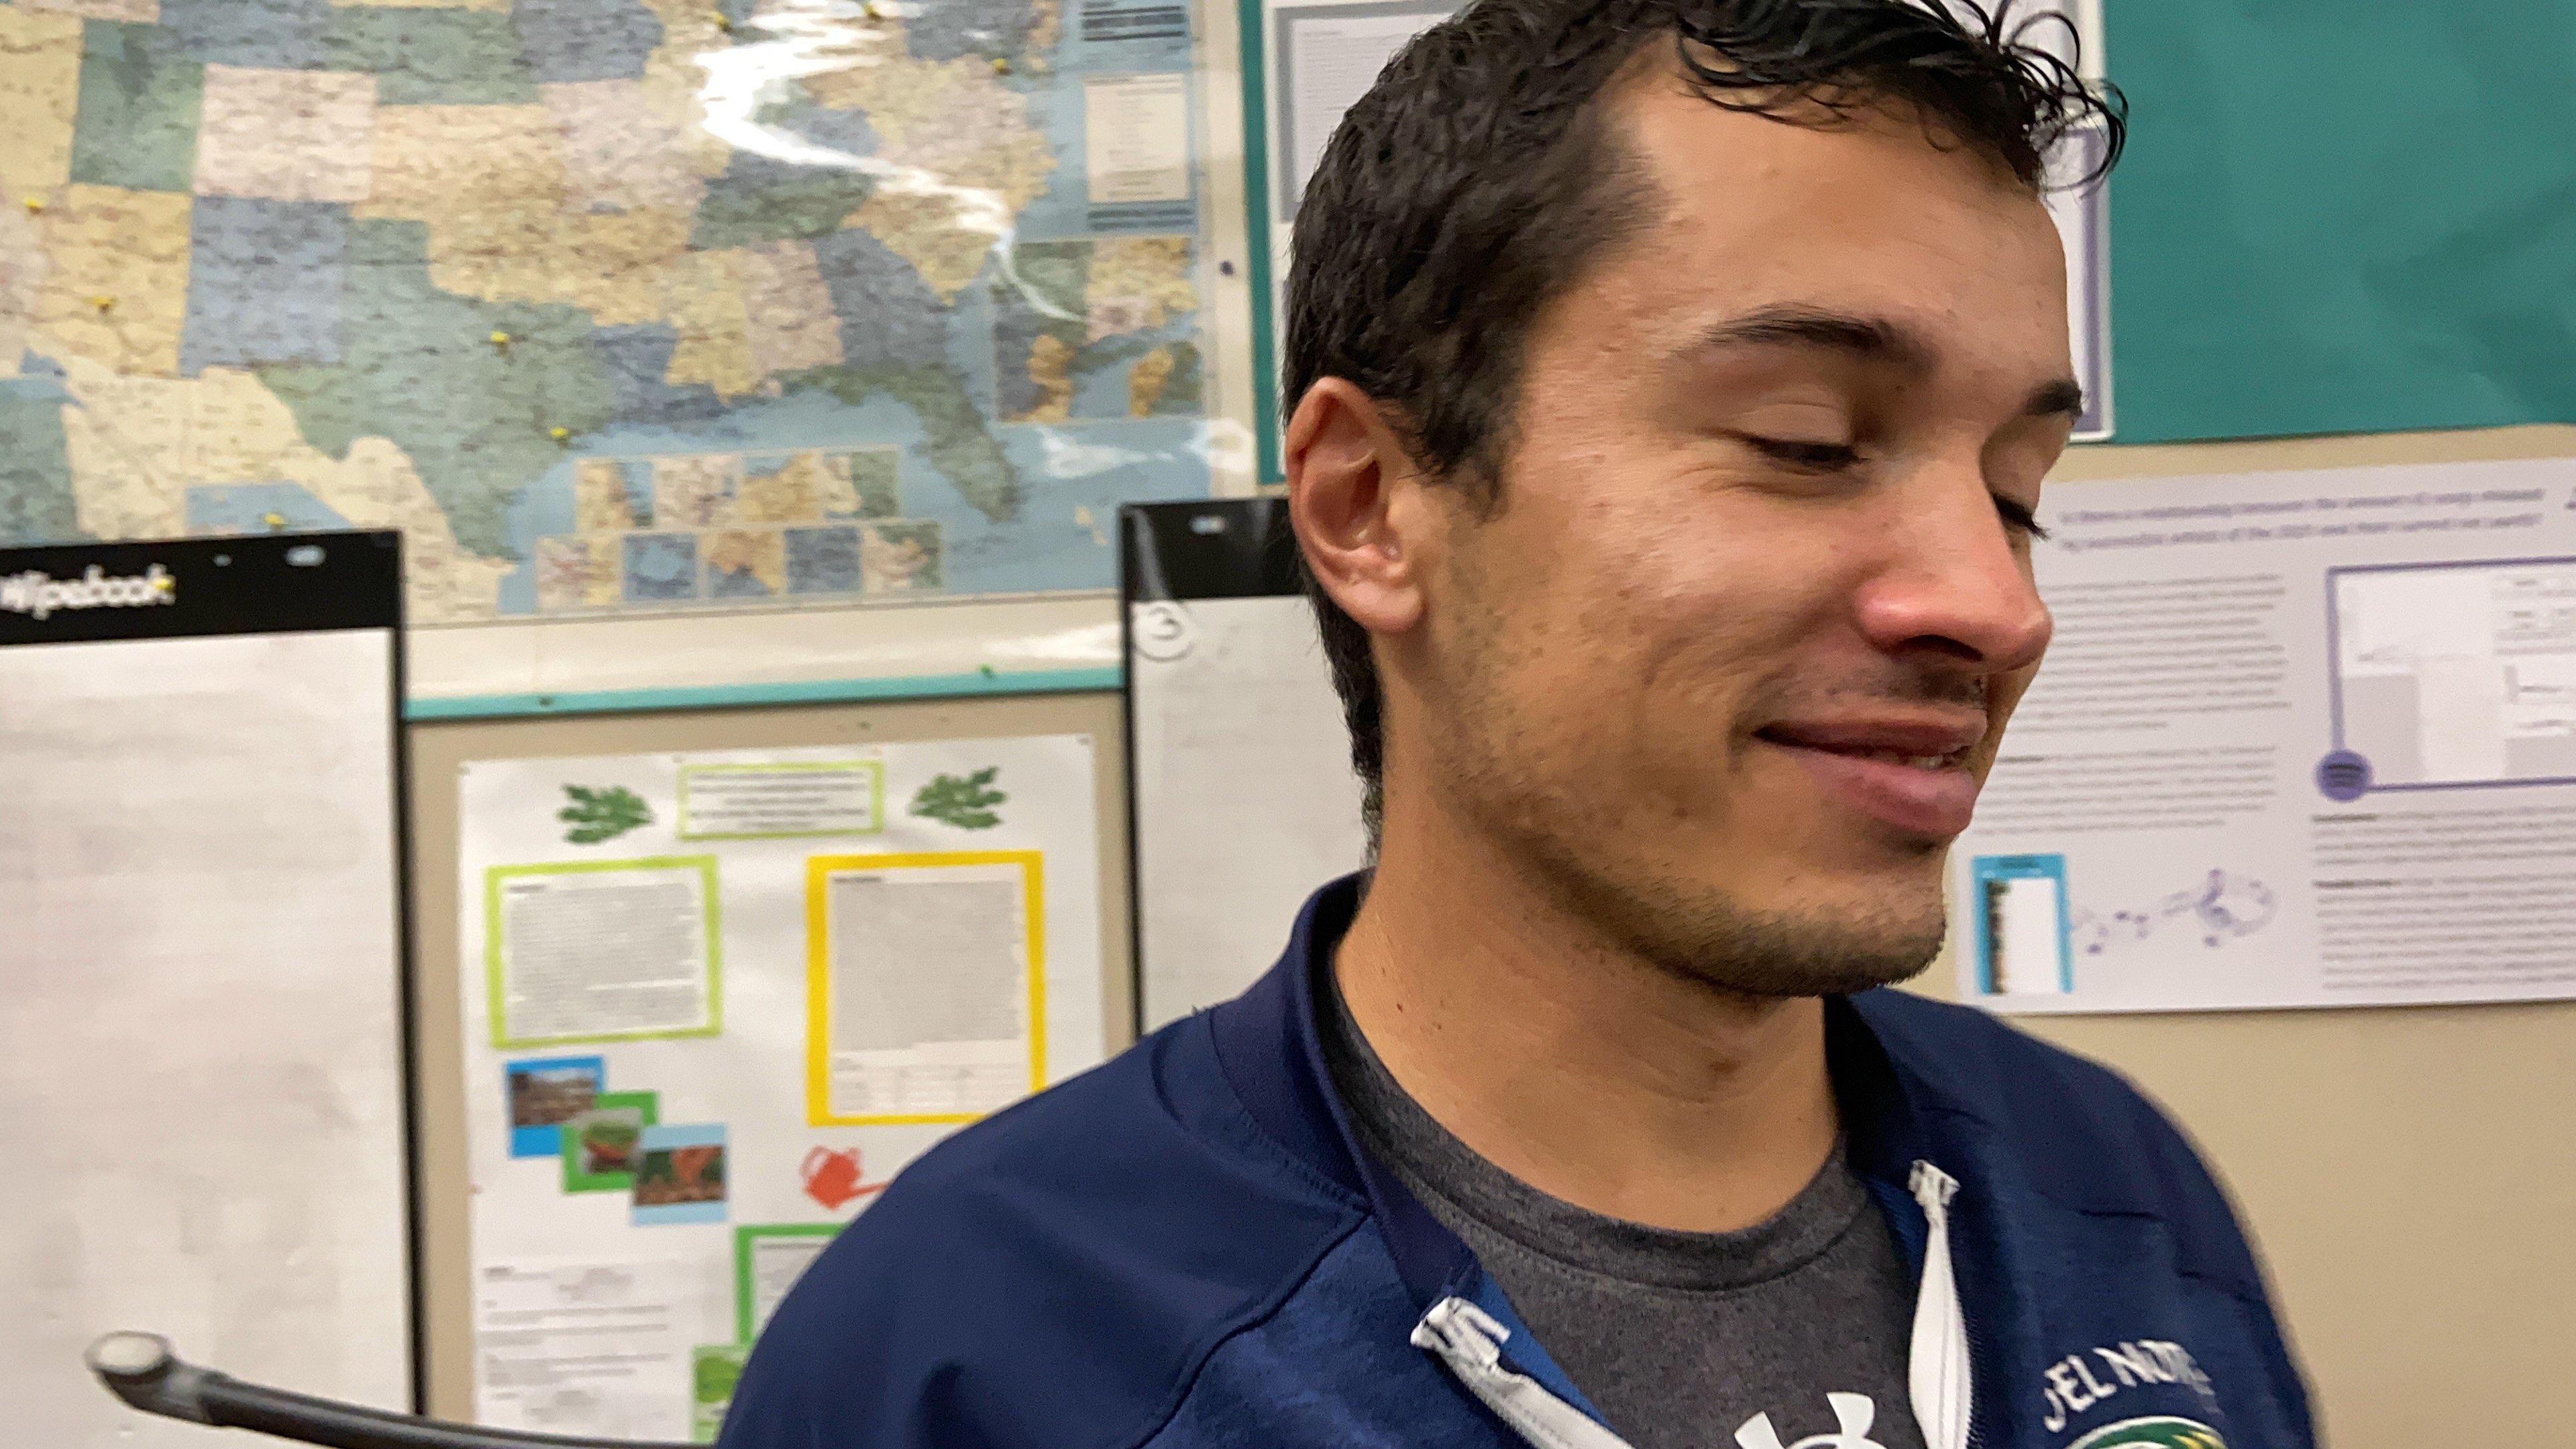

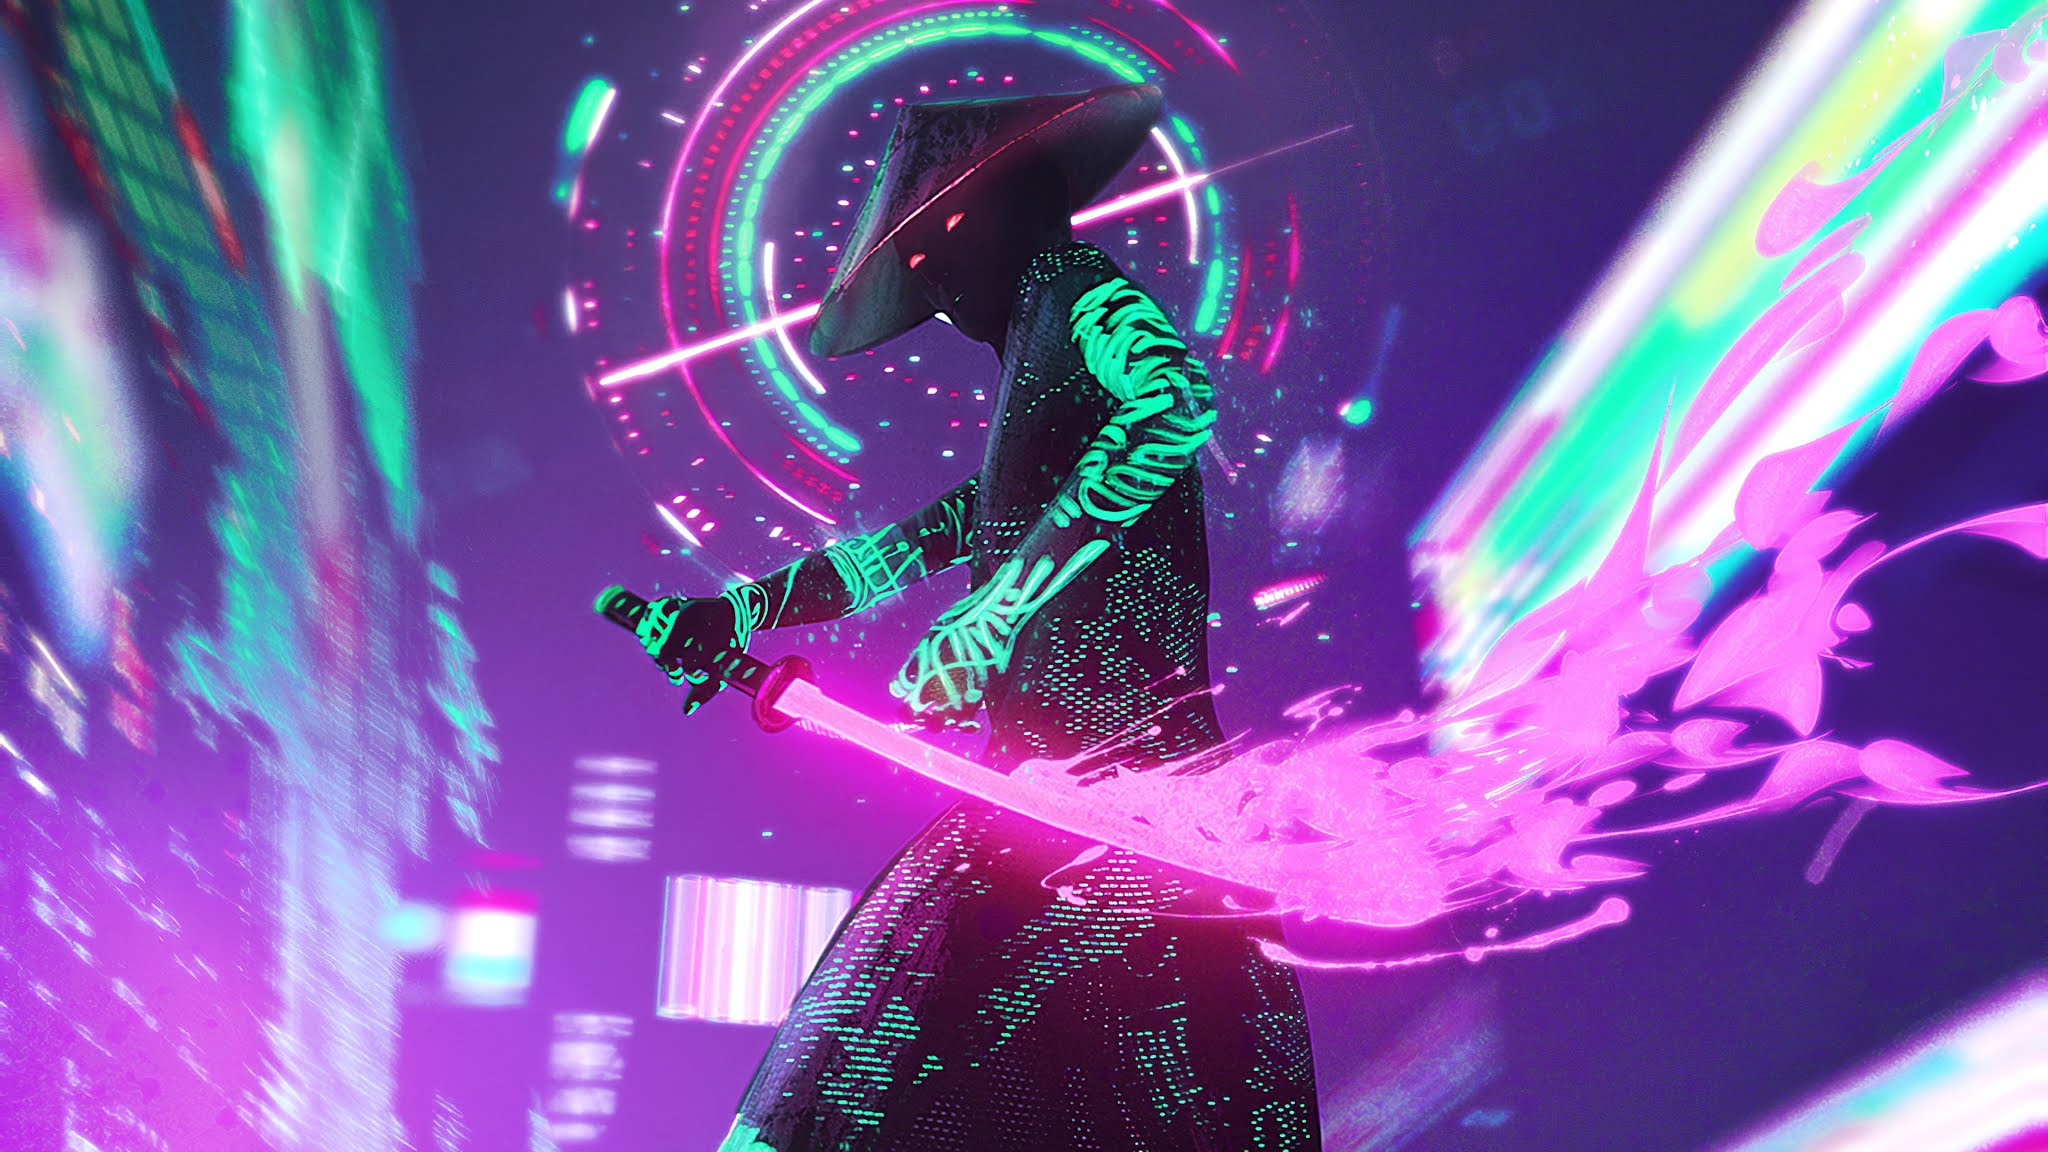

In [19]:

from IPython.display import Image, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Kung Fu Panda", 'label': "Panda Po", 'file': "kungfupanda.png"},
            {'source': "Coach Mark", 'label': "Funny Picture", 'file': "coachmark.jpg"},
            {'source': "Internet", 'label': "Cool Image", 'file': "cool-image.jpg"}
            
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))


# Run this as standalone tester to see sample data printed in Jupyter terminal
if __name__ == "__main__":
    # print parameter supplied image
    # display default images from image_data()
    default_images = image_data()
    image_display(default_images)
    

-- original image --



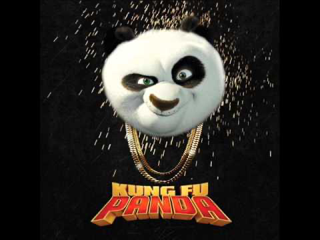

--- grey image ----



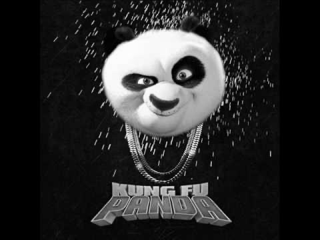


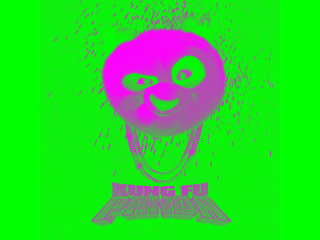

-- original image --



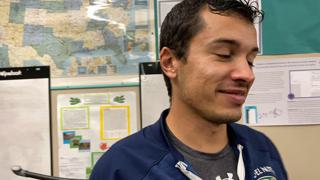

--- grey image ----



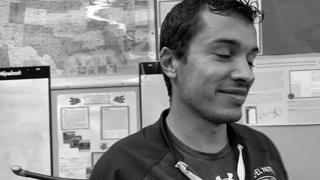


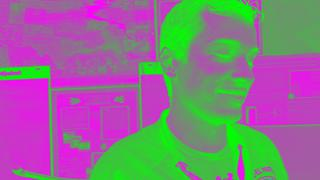

-- original image --



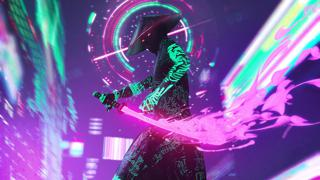

--- grey image ----



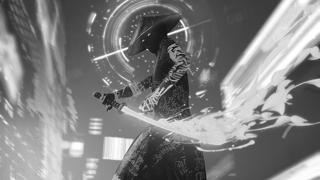


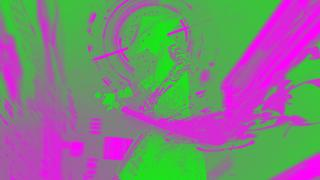

In [20]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as pilImage is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Kung Fu Panda", 'label': "Panda Po", 'file': "kungfupanda.png"},
            {'source': "Coach Mark", 'label': "Funny Picture", 'file': "coachmark.jpg"},
            {'source': "Internet", 'label': "Cool Image", 'file': "cool-image.jpg"}

        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Large image scaled to baseWidth of 320
def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

# Set Properties of Image, Scale, and convert to Base64
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
# Create Grey Scale Base64 representation of Image
def image_management_add_html_grey(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['gray_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['gray_data'].append((average, average, average, pixel[3])) # PNG format
        else:
            image['gray_data'].append((average, average, average))
        # end for loop for pixels
        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)

def image_management_add_html_green(image):
    # Image open return PIL image object
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
    image['data'] = np.array(img_data) # PIL image to numpy array
    image['green_data'] = [] # key/value for data converted to gray scale

    # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
    for pixel in image['data']:
        green = 255 - (pixel[1])
        # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
        average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
        if len(pixel) > 3:
            image['green_data'].append((average, green, average, pixel[3])) # PNG format
        else:
            image['green_data'].append((average, green, average))
        # end for loop for pixels
        
    img.putdata(image['green_data'])
    image['html_green'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)


# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data()
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_management_add_html_grey(image)
        image_management_add_html_green(image)
        display(HTML(image['html_grey'])) 
        display(HTML(image['html_green']))
    print()